In [99]:
import numpy as np
import pandas as pd
df = pd.read_csv('/Users/anugrapaul/Downloads/final_dataset.csv')

In [100]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [101]:
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


Checking correlation w.r.t AQI.

In [102]:
df.corr()['AQI'].sort_values()

Ozone            -0.164281
Year             -0.083563
Month            -0.034169
Date             -0.001057
Holidays_Count    0.000447
Days              0.002113
SO2               0.036288
NO2               0.319261
CO                0.696809
PM2.5             0.801960
PM10              0.899421
AQI               1.000000
Name: AQI, dtype: float64

Dropping the columns with weak correlation ~ range [-0.1, 0.1].

In [103]:
df = df.drop(columns=['Date','Month','Year','Holidays_Count','Days'])

In [104]:
df.head()

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,408.80,442.42,160.61,12.95,2.77,43.19,462
1,404.04,561.95,52.85,5.18,2.60,16.43,482
2,225.07,239.04,170.95,10.93,1.40,44.29,263
3,89.55,132.08,153.98,10.42,1.01,49.19,207
4,54.06,55.54,122.66,9.70,0.64,48.88,149


In [105]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1461 non-null   float64
 1   PM10    1461 non-null   float64
 2   NO2     1461 non-null   float64
 3   SO2     1461 non-null   float64
 4   CO      1461 non-null   float64
 5   Ozone   1461 non-null   float64
 6   AQI     1461 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 80.0 KB


In [107]:
X = df.iloc[:,[0,1,2,3,4,5]]
y = df.iloc[:,[6]]


Splitting dataset in Train and test data sets.

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
y_test

,AQI
892,176
1105,314
413,258
522,262
1036,459
...,...
1361,167
802,228
651,115
722,266


A pipeline is used to automate the process of adding Polynomial Features, Scaling and normalizing and fitting the data in model.

In [110]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
pipeline.fit(X_train, y_train)
print("R^2 on test:", pipeline.score(X_test, y_test))


R^2 on test: 0.9339647772215056


Evaluating model performance on the basis of R2 score, Mean Squared Error , Root MSE

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")


R^2: 0.934
MSE: 856.914
RMSE: 29.273
MAE: 21.110


Error Analysis and checking for Overfitting/ Underfitting

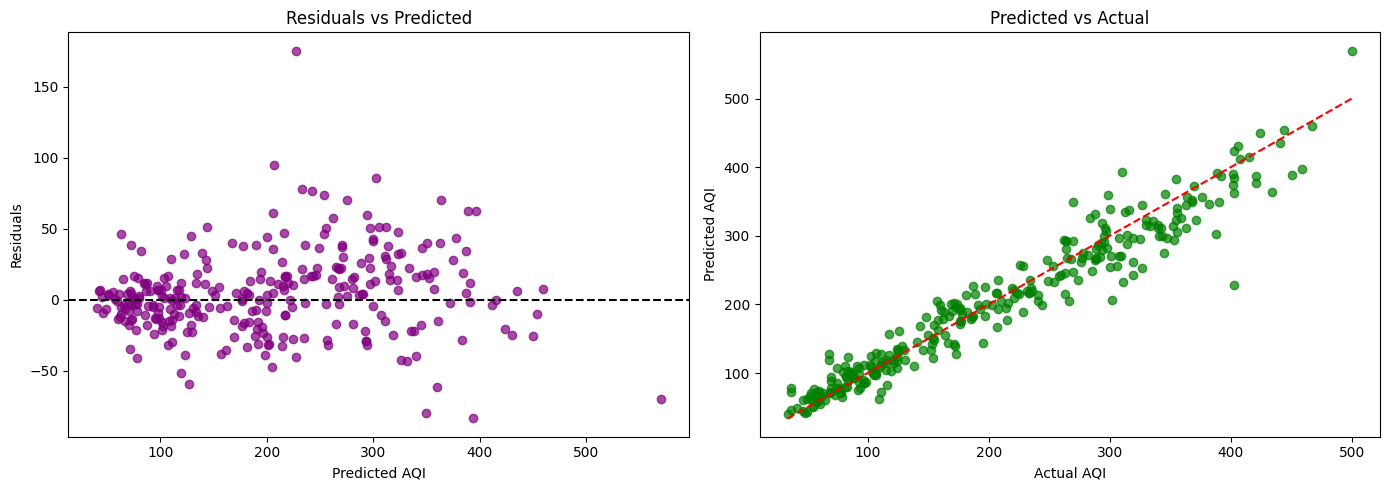

In [112]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--') 
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual')

plt.tight_layout()
plt.show()


Checking R2 Score on training and test sets to confirm balanced data.

In [113]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Train R²:", r2_train)
print("Train RMSE:", rmse_train)
print("Test R²:", r2_test)
print("Test RMSE:", rmse_test)

Train R²: 0.9238769930949834
Train RMSE: 29.280253726341098
Test R²: 0.9339647772215056
Test RMSE: 29.27308858673523


Since R2 train is very close to R2 test, we can conclude model is not underfitting or overfitting.